# DataCleansing - Pandas Project 🦈

## HIPOTESIS: ¿Realmente quieren atacarnos los tiburones?
Vamos a analizar las horas del día en la que se producen los ataques y entender la influencia que tiene la luz para intentar responder a la pregunta.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import re

Por un "UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 1: invalid start byte"
hay que poner ,encoding='latin1'

In [2]:
df = pd.read_csv("INPUT/sharky_messy.csv",encoding="latin1")
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


Definimos las funciones globales que se van a utilizar durante el proceso de limpieza en diferentes campos.
- columnCompare(col1,col2,perc) --> Compara la info de dos columnas. Sirve para saber si hace falta eliminar una columna duplicada. 
- foundDate(arr) --> Regular Expression para obtener la fecha de una columna "Date". (Descartada)
- foundDate2(arr) --> Regular Expression para obtener la fecha de la columna "Case Number"  
- giveAcum(a,b) --> Muestra en pantalla la información del campo "b" del DataSet "a" acumulado por valores.

In [3]:
def columnCompare(col1,col2,perc):
    equal = 0
    dist = 0
    for i in range(5992):
        if df[col1][i] == df[col2][i]:
            equal +=1
        else:
            dist +=1

    porcent_dist = dist/(equal+dist)*100

    print("equal:",equal)
    print("dist:",dist)
    print("Porcentaje diferencias:",round(porcent_dist,2),"%")

    if porcent_dist<perc:
        print("Se puede despreciar las diferentes frente al total")
    else:
        print("El valor es significativo, son columnas diferentes")
        
        
def foundDate(arr):
    date=r"\d{2}-\w{3}-\d+"
    new=[]
    for i in arr:
        if re.findall(date,i):
            new.append(re.findall(date, i)[0])
        else:
            new.append("NotDoc")
    return new


def foundDate2(arr):
    date=r"\d{4}\.\d{2}\.\d{2}"
    new=[]
    for i in arr:
        if re.findall(date,i):
            new.append(re.findall(date, i)[0])
        else:
            new.append("NotDoc")
    return new

#NO ESTÁ FUNCIONANDO 👀
def giveAcum(a,b):
    for col, num in a.b.value_counts().items():
        if num > 0:
            print(f"{col} {num}")

Vamos a analizar las columnas y la información general que nos encontramos para quedarnos con un dataset que aporte valor al análisis

In [4]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [5]:
df.shape

(5992, 24)

## CLEAN 1
Descartar columnas que no interesan para el análisis en un nuevo dataset:
    - Unnamed 22 y 23, parecen columnas de "comentarios" cuando se generaba el dataset que no aportan información.

In [6]:
df.isnull().sum().sort_values(ascending=False).head(10)

Unnamed: 22    5991
Unnamed: 23    5990
Time           3213
Species        2934
Age            2681
Sex             567
Activity        527
Location        496
Area            402
Name            200
dtype: int64

In [7]:
df["Unnamed: 22"].value_counts()

stopped here    1
Name: Unnamed: 22, dtype: int64

In [8]:
df["Unnamed: 23"].value_counts()

change filename    1
Teramo             1
Name: Unnamed: 23, dtype: int64

In [9]:
df_clean1 = df.drop(["Unnamed: 22","Unnamed: 23"],axis = 1)
df_clean1.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989


## CLEAN 2 
Analizamos los campos que pueden tener valores repetidos. Usando la función columnCompare()
    - href formula
    - Case Number 1.
    - Case Number 2.

In [10]:
df['href'].equals(df['href formula'])

False

In [11]:
columnCompare("href","href formula",5)

equal: 5938
dist: 54
Porcentaje diferencias: 0.9 %
Se puede despreciar las diferentes frente al total


In [12]:
columnCompare("Case Number","Case Number.1",5)

equal: 5979
dist: 13
Porcentaje diferencias: 0.22 %
Se puede despreciar las diferentes frente al total


In [13]:
columnCompare("Case Number.1","Case Number.2",5)

equal: 5981
dist: 11
Porcentaje diferencias: 0.18 %
Se puede despreciar las diferentes frente al total


Despreciamos entonces la información de esos 3 campos

In [14]:
df_clean2 = df_clean1.drop(["href formula","Case Number.1","Case Number.2"],axis = 1)
df_clean2.head(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href,original order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5989
5,2016.09.15.R,15-Sep-16,2016,Boat,AUSTRALIA,Western Australia,Bunbury,Fishing,Occupant: Ben Stratton,NaN,NaN,Shark rammed boat. No injury to occupant,N,NaN,NaN,"West Australian, 9/15/2016",2016.09.15.R-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5988
6,2016.09.11,11-Sep-16,2016,Unprovoked,USA,Florida,"Ponte Vedra, St. Johns County",Wading,male,M,60s,Minor injury to arm,N,15h15,3' to 4' shark,"News4Jax, 9/11/2016",2016.09.11-PonteVedra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5987
7,2016.09.07,07-Sep-16,2016,Unprovoked,USA,Hawaii,"Makaha, Oahu",Swimming,female,F,51,Severe lacerations to shoulder & forearm,N,14h30,"Tiger shark, 10?","Hawaii News Now, 9/7/2016",2016.09.07-Oahu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5986
8,2016.09.06,06-Sep-16,2016,Unprovoked,NEW CALEDONIA,North Province,Koumac,Kite surfing,David Jewell,M,50,FATAL,Y,15h40,NaN,"TVANouvelles, 9/6/2016",2016.09.06-Jewell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5985
9,2016.09.05.b,05-Sep-16,2016,Unprovoked,USA,South Carolina,"Kingston Plantation, Myrtle Beach, Horry County",Boogie boarding,Rylie Williams,F,12,Lacerations & punctures to lower right leg,N,Late afternoon,NaN,"C. Creswell, GSAF",2016.09.05.b-Williams.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5984


In [15]:
df_clean2.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href', 'original order'],
      dtype='object')

## Clean 3
Ahora eliminamos las columnas con información que no aporta datos relevantes:
- "Investigator or Source" NA
- "Name" NA
- "original order" parece el ínidice que tenían antes de utilizar una nueva numeración. NA
- "href", "pdf", "species". No aportan valor extra al análisis que se va a realizar. NA

In [16]:
df_clean3 = df_clean2.drop(["Investigator or Source","Name","original order","href","pdf","Species "],axis = 1)
df_clean3.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,16,Minor injury to thigh,N,13h00
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,36,Lacerations to hands,N,11h00
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,43,Lacerations to lower leg,N,10h43
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,NaN,Struck by fin on chest & leg,N,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,NaN,No injury: Knocked off board by shark,N,NaN


In [17]:
#Renombramos las columnas
dfc = df_clean3.rename(columns={"Sex ":"Sex", 
                                "Fatal (Y/N)":"Fatal", 
                                "Case Number":"ID", 
                                })
dfc.head()

,ID,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,16,Minor injury to thigh,N,13h00
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,36,Lacerations to hands,N,11h00
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,43,Lacerations to lower leg,N,10h43
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,NaN,Struck by fin on chest & leg,N,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,NaN,No injury: Knocked off board by shark,N,NaN


In [18]:
dfc.dtypes

ID          object
Date        object
Year         int64
Type        object
Country     object
Area        object
Location    object
Activity    object
Sex         object
Age         object
Injury      object
Fatal       object
Time        object
dtype: object

## Clean 4
Empezamos a limpiar los campos

In [19]:
dfc.Sex.value_counts()

M      4835
F       585
M         2
.         1
lli       1
N         1
Name: Sex, dtype: int64

In [20]:
dfc.Sex = dfc.Sex.fillna("NotDoc")

In [21]:
#Arreglamos la columna SEX
dfc["Sex"][dfc["Sex"].str.startswith("M ")] = "M"
dfc["Sex"][dfc["Sex"].str.startswith("N")] = "NotDoc"
dfc["Sex"][dfc["Sex"].str.startswith("lli")] = "NotDoc"
dfc["Sex"][dfc["Sex"].str.startswith(".")] = "NotDoc"

/Users/miguelceinos/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/miguelceinos/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/miguelceinos/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [22]:
dfc.Sex.value_counts()

M         4837
F          585
NotDoc     570
Name: Sex, dtype: int64

In [23]:
aux =[]
for i in dfc.Date:
    if len(i) > 9:
        aux.append(i)
print(aux[:100])

['Reported  14-Jul-2016', 'Reported 08-Jul-2016', 'Reported 03-Mar-2016', ' 19-Feb-2016', 'Reported 10-Feb-2016', 'Reported 11-Jan-2016', 'Reported 25-Jun-2015', 'Reported 23-Dec-2014', 'Reported 03-Dec-2014', 'Reported 17-Nov-2014', 'Reported 12-Sep-2014', 'Reported 25-Aug-2014', 'Reported 27-Jun-2014', 'Reported 17-Jun-2014', 'Reported 10-May-2014', 'Reported 12-Apr-2014', 'Reported 17-Feb-2014', ' 25-Sep-2013', ' 21-Sep-2013', ' 21-Sep-2013', ' 14-Sep-2013', ' 12-Sep-2013', ' 07-Sep-2013', ' 07-Sep-2013', ' 02-Sep-2013', ' 01-Sep-2013', ' 01-Sep-2013', ' 01-Sep-2013', ' 25-Aug-2013', ' 25-Aug-2013', ' 18-Aug-2013', ' 14-Aug-2013', ' 13-Aug-2013', 'Reported 08-Aug-2013', ' 05-Aug-2013', '  31-Jul-2013', '  30-Jul-2013', '  29-Jul-2013', '  29-Jul-2013', '    22-Jul-2013', 'Reported 17-Jul-2013', 'Reported 14-Jun-2013', 'Reported 02-Apr-2013', 'Reported 21-Mar-2013', 'Reported 21-Jan-2013', 'Reported 11-Oct-2012', 'Reported 28-Jun-2012', 'Reported 22-Jan-2012', 'Reported 26-Dec-2011',

Como la columna Date no tiene la información bien documentada, se obtiene la fecha utilizando el campo "ID" y lya función foundDate2

In [24]:
newcol = foundDate2(dfc.ID)

In [25]:
print(newcol[:100])

['2016.09.18', '2016.09.18', '2016.09.18', '2016.09.17', '2016.09.15', '2016.09.15', '2016.09.11', '2016.09.07', '2016.09.06', '2016.09.05', '2016.09.05', '2016.09.04', '2016.09.01', '2016.08.29', '2016.08.29', '2016.08.27', '2016.08.25', '2016.08.07', '2016.08.06', '2016.08.04', '2016.07.29', '2016.07.28', '2016.07.28', '2016.07.27', '2016.07.26', '2016.07.24', '2016.07.23', '2016.07.23', '2016.07.20', '2016.07.17', '2016.07.16', '2016.07.16', '2016.07.15', '2016.07.14', '2016.07.08', '2016.07.08', '2016.07.07', '2016.07.07', '2016.07.06', '2016.07.04', '2016.06.27', '2016.06.25', '2016.06.24', '2016.06.23', '2016.06.21', '2016.06.21', '2016.06.15', '2016.06.15', '2016.06.14', '2016.06.11', '2016.06.07', '2016.06.05', '2016.06.05', '2016.06.04', '2016.06.02', '2016.06.02', '2016.05.31', '2016.05.29', '2016.05.29', '2016.05.22', '2016.05.21', '2016.05.21', '2016.05.18', '2016.05.15', '2016.05.03', '2016.05.02', '2016.04.25', '2016.04.23', '2016.04.22', '2016.04.19', '2016.04.18', '2016

Guardamos la información en la tabla con el campo "new_date"

In [26]:
column_values = pd.Series(newcol)
dfc.insert(loc=2, column='new_date', value=column_values)
dfc.head()

,ID,Date,new_date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time
0,2016.09.18.c,18-Sep-16,2016.09.18,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,16,Minor injury to thigh,N,13h00
1,2016.09.18.b,18-Sep-16,2016.09.18,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,36,Lacerations to hands,N,11h00
2,2016.09.18.a,18-Sep-16,2016.09.18,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,43,Lacerations to lower leg,N,10h43
3,2016.09.17,17-Sep-16,2016.09.17,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,NaN,Struck by fin on chest & leg,N,NaN
4,2016.09.15,16-Sep-16,2016.09.15,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,NaN,No injury: Knocked off board by shark,N,NaN


In [27]:
dfc.dtypes

ID          object
Date        object
new_date    object
Year         int64
Type        object
Country     object
Area        object
Location    object
Activity    object
Sex         object
Age         object
Injury      object
Fatal       object
Time        object
dtype: object

In [28]:
dfc.new_date.value_counts()

NotDoc        126
1950.00.00     13
1957.00.00     11
1942.00.00     11
1960.00.00     10
             ... 
2001.04.05      1
2012.08.04      1
1992.12.23      1
1998.03.08      1
1959.01.00      1
Name: new_date, Length: 4946, dtype: int64

In [29]:
for i in dfc.new_date:
    if len(i) > 10:
        print (i)

Se comprueba que ningún valor está por encima de 10 cifras. Por lo que todos tienen el formato XX.XX.XX o "NotDoc"

## Clean 6 
Con la columna "new_date": obtendremos la información dividida en 3 campos nuevos: día, mes y año. Utilizando las funciones definidas.

In [30]:
def dayCalculator(arr):
    days = []
    for i in arr:
        if i[8:] == "00" or i == "NotDoc":
            days.append("NotDoc")
        else:
            days.append(i[8:])
    return days
        
def monthCalculator(arr):
    meses = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]
    months = []
    for i in arr:
        if i[5:7] == "00" or i == "NotDoc":
            months.append("NotDoc")
        else:
            months.append(meses[int(i[5:7])-1])
    return months

def yearCalculator(arr):
    years = []
    for i in arr:
        if i[:4] == "00" or i == "NotDoc":
            years.append("NotDoc")
        else:
            years.append(i[:4])
    return years

In [31]:
days = dayCalculator(dfc.new_date)
months = monthCalculator(dfc.new_date)
years = yearCalculator(dfc.new_date)

In [32]:
column_years = pd.Series(years)
dfc.insert(loc=3, column='new_years', value=column_years)

column_months = pd.Series(months)
dfc.insert(loc=3, column='new_months', value=column_months)

column_days = pd.Series(days)
dfc.insert(loc=3, column='new_days', value=column_days)

In [33]:
dfc.head()

,ID,Date,new_date,new_days,new_months,new_years,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time
0,2016.09.18.c,18-Sep-16,2016.09.18,18,Sep,2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,16,Minor injury to thigh,N,13h00
1,2016.09.18.b,18-Sep-16,2016.09.18,18,Sep,2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,36,Lacerations to hands,N,11h00
2,2016.09.18.a,18-Sep-16,2016.09.18,18,Sep,2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,43,Lacerations to lower leg,N,10h43
3,2016.09.17,17-Sep-16,2016.09.17,17,Sep,2016,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,NaN,Struck by fin on chest & leg,N,NaN
4,2016.09.15,16-Sep-16,2016.09.15,15,Sep,2016,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,NaN,No injury: Knocked off board by shark,N,NaN


In [34]:
dfc.new_years.value_counts()

2015      138
2011      128
NotDoc    126
2014      125
2013      122
         ... 
1854        1
1771        1
1803        1
0005        1
1638        1
Name: new_years, Length: 232, dtype: int64

In [35]:
dfc.new_months.value_counts()

Jul       633
Ago       579
NotDoc    524
Sep       524
Ene       500
Jun       474
Dic       423
Abr       410
Oct       407
Mar       398
Nov       393
May       368
Feb       359
Name: new_months, dtype: int64

In [36]:
dfc.new_days.value_counts()

NotDoc    861
26        200
15        188
27        185
02        183
28        179
25        178
14        176
24        173
12        173
11        172
09        171
13        171
10        170
05        170
22        169
04        169
21        169
16        169
06        167
01        167
19        167
08        163
03        155
07        155
30        154
29        153
18        150
23        147
20        144
17        142
31        102
Name: new_days, dtype: int64

## Clean 7

Limpiamos la información de las horas del día. Cuando tenga información se queda con el valor de la hora. Si la información no está facilitada se escribirá "NotDoc". Si hay un error será "FailDoc"

In [37]:
#Vamos a por las horas del día.
dfc.Time.value_counts()

Afternoon                   174
11h00                       123
Morning                     107
12h00                       107
15h00                       100
                           ... 
17h42                         1
Ship aban-doned at 03h10      1
Mid-morning                   1
07h00 - 08h00                 1
16h25                         1
Name: Time, Length: 357, dtype: int64

In [38]:
dfc.Time = df.Time.fillna("NotDoc").astype("str")

In [39]:
dfc.Time.value_counts()

NotDoc                      3213
Afternoon                    174
11h00                        123
Morning                      107
12h00                        107
                            ... 
17h42                          1
Ship aban-doned at 03h10       1
07h00 - 08h00                  1
Mid-morning                    1
10h00 / 11h00                  1
Name: Time, Length: 358, dtype: int64

In [40]:
dfc.Time = dfc.Time.astype("str")

In [41]:
dfc.Time.value_counts()

NotDoc                      3213
Afternoon                    174
11h00                        123
Morning                      107
12h00                        107
                            ... 
17h42                          1
Ship aban-doned at 03h10       1
07h00 - 08h00                  1
Mid-morning                    1
10h00 / 11h00                  1
Name: Time, Length: 358, dtype: int64

Definimos una función que nos devuelva la hora en formato XX cuando esta exista "XXh

In [42]:
def findHour(arr):
    hours = []
    formato = r"\d+h\d+"
    for i in arr:
        if re.findall(formato,i):
            hours.append(re.findall(formato,i)[0][:2])
        else:
            hours.append(i)
    return hours

In [43]:
hours = findHour(dfc.Time)
print(hours[:100])

['13', '11', '10', 'NotDoc', 'NotDoc', 'NotDoc', '15', '14', '15', 'Late afternoon', 'Late afternoon', 'NotDoc', 'NotDoc', '15', '14', '17', '16', 'NotDoc', 'NotDoc', 'NotDoc', '11', 'NotDoc', 'NotDoc', 'NotDoc', '12', '19', 'NotDoc', 'NotDoc', 'After noon', 'NotDoc', '1300', '11', 'NotDoc', 'NotDoc', 'NotDoc', 'NotDoc', '10', 'NotDoc', '14', '22', '16', '14', '11', 'NotDoc', '15', '14', '06', 'NotDoc', '17', '15', '11', '08', '11', 'Morning', 'NotDoc', 'Afternoon', '16', '16', '15', '12', '18', '17', 'Morning ', '13', '15', 'Afternoon', '07', '17', '08', '12', 'NotDoc', 'NotDoc', '10', 'NotDoc', 'NotDoc', 'NotDoc', '11', '19', 'NotDoc', '11', 'NotDoc', 'Morning', '13', 'Afternoon', 'Afternoon', 'Midnight', 'NotDoc', '19', '16', '15', 'NotDoc', '12', '13', 'Late afternoon', 'NotDoc', '14', '11', '09', 'NotDoc', 'Morning']


In [44]:
dfc.insert(loc=3, column='new_time', value=pd.Series(hours))
dfc.head()

,ID,Date,new_date,new_time,new_days,new_months,new_years,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time
0,2016.09.18.c,18-Sep-16,2016.09.18,13,18,Sep,2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,16,Minor injury to thigh,N,13h00
1,2016.09.18.b,18-Sep-16,2016.09.18,11,18,Sep,2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,36,Lacerations to hands,N,11h00
2,2016.09.18.a,18-Sep-16,2016.09.18,10,18,Sep,2016,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,43,Lacerations to lower leg,N,10h43
3,2016.09.17,17-Sep-16,2016.09.17,NotDoc,17,Sep,2016,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,NaN,Struck by fin on chest & leg,N,NotDoc
4,2016.09.15,16-Sep-16,2016.09.15,NotDoc,15,Sep,2016,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,NaN,No injury: Knocked off board by shark,N,NotDoc


Limpiamos de nuevo el dataset:
Me quedo con el ID, new_date, new_time, new_days, new_months, new_years, Type, Country, Area, Activity, Sex, Age, Injury, Fatal.

In [45]:
dfn = dfc[["ID","new_time","new_date","new_days","new_months","new_years", "Type", "Country", "Area", "Activity", "Sex", "Age", "Injury", "Fatal"]]

In [46]:
dfn.head()

,ID,new_time,new_date,new_days,new_months,new_years,Type,Country,Area,Activity,Sex,Age,Injury,Fatal
0,2016.09.18.c,13,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,M,16,Minor injury to thigh,N
1,2016.09.18.b,11,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,M,36,Lacerations to hands,N
2,2016.09.18.a,10,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,M,43,Lacerations to lower leg,N
3,2016.09.17,NotDoc,2016.09.17,17,Sep,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,M,NaN,Struck by fin on chest & leg,N
4,2016.09.15,NotDoc,2016.09.15,15,Sep,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,M,NaN,No injury: Knocked off board by shark,N


In [47]:
dfn.new_time.value_counts()

NotDoc                           3213
11                                250
16                                230
14                                229
15                                223
                                 ... 
                                    1
X                                   1
30 minutes after 1992.07.08.a       1
00                                  1
Mid afternoon                       1
Name: new_time, Length: 92, dtype: int64

## Clean 8

Generamos un campo llamado daytime con su función asociada. para que agrupe los valores en 4 opciones utilizando Exp:

    - daytime=["Morning","Afternoon","Sunset","Night"]
        
        Distribución horaria:
        - MORNING: de 05h a 12h
        - AFTERNOON: de 12h a 17h
        - SUNSET: de 17h a 21h
        - NIGHT: de 21h a 05h
   

In [48]:
def dayTime(arr):
    
    #daytime=["Morning","Afternoon","Sunset","Night"]
    daytime =[]
    morning_match = r"(\worning|\wunch|\waybreak|\widday|\waytime|05|06|07|08|09|10|11|830)"
    morning = ["lunchtime", "midday"]
    afternoon_match = r"(\w+noon|\wnon|\woon|12|13|14|15|16)"
    sunset = ["just before noon", "daybreak", "sundown", "dawn", "sunset","dusk"]
    sunset_match = r"(\wunset|\wusk|\wvening|\wawn|\wundown|17|18|19|20)"
    night = ["noon","midnight","night"]
    night_match = r"(\widnight|\wark|\wight|21|22|23|24|00|01|02|03|04)"
    for i in arr:
        if i == "NotDoc":
            daytime.append("NotDoc")
        elif type(i)!= "int" or type(i) != "float":
            if i.lower() in morning or re.findall(morning_match,i):
                daytime.append("Morning")
            elif re.findall(afternoon_match,i):
                daytime.append("Afternoon")
            elif i.lower() in sunset or re.findall(sunset_match,i):
                daytime.append("Sunset")
            elif i.lower() in night or re.findall(night_match,i):
                daytime.append("Night")
            else:
                daytime.append("FailDoc")

                
    return daytime       

In [49]:
daytime = dayTime(dfn.new_time)
print(daytime[:100])

['Afternoon', 'Morning', 'Morning', 'NotDoc', 'NotDoc', 'NotDoc', 'Afternoon', 'Afternoon', 'Afternoon', 'Afternoon', 'Afternoon', 'NotDoc', 'NotDoc', 'Afternoon', 'Afternoon', 'Sunset', 'Afternoon', 'NotDoc', 'NotDoc', 'NotDoc', 'Morning', 'NotDoc', 'NotDoc', 'NotDoc', 'Afternoon', 'Sunset', 'NotDoc', 'NotDoc', 'Afternoon', 'NotDoc', 'Afternoon', 'Morning', 'NotDoc', 'NotDoc', 'NotDoc', 'NotDoc', 'Morning', 'NotDoc', 'Afternoon', 'Night', 'Afternoon', 'Afternoon', 'Morning', 'NotDoc', 'Afternoon', 'Afternoon', 'Morning', 'NotDoc', 'Sunset', 'Afternoon', 'Morning', 'Morning', 'Morning', 'Morning', 'NotDoc', 'Afternoon', 'Afternoon', 'Afternoon', 'Afternoon', 'Afternoon', 'Sunset', 'Sunset', 'Morning', 'Afternoon', 'Afternoon', 'Afternoon', 'Morning', 'Sunset', 'Morning', 'Afternoon', 'NotDoc', 'NotDoc', 'Morning', 'NotDoc', 'NotDoc', 'NotDoc', 'Morning', 'Sunset', 'NotDoc', 'Morning', 'NotDoc', 'Morning', 'Afternoon', 'Afternoon', 'Afternoon', 'Night', 'NotDoc', 'Sunset', 'Afternoon', 

In [50]:
dfn.insert(loc=2, column='daytime', value=pd.Series(daytime))
dfn.head()

,ID,new_time,daytime,new_date,new_days,new_months,new_years,Type,Country,Area,Activity,Sex,Age,Injury,Fatal
0,2016.09.18.c,13,Afternoon,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,M,16,Minor injury to thigh,N
1,2016.09.18.b,11,Morning,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,M,36,Lacerations to hands,N
2,2016.09.18.a,10,Morning,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,M,43,Lacerations to lower leg,N
3,2016.09.17,NotDoc,NotDoc,2016.09.17,17,Sep,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,M,NaN,Struck by fin on chest & leg,N
4,2016.09.15,NotDoc,NotDoc,2016.09.15,15,Sep,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,M,NaN,No injury: Knocked off board by shark,N


In [51]:
for col, num in dfn.daytime.value_counts().items():
    if num > 0:
        print(f"{col} {num}")

NotDoc 3213
Afternoon 1298
Morning 880
Sunset 447
Night 115
FailDoc 39


## Clean 9
Ahora vamos a obtener un campo que nos de las horas en las que se producen los ataques.
 - XX con la hora del ataque
 - NotDoc cuando no hay información reportada de la hora.
 
 Para ello partimos del campo new_time que teniamos pretrabajado, para después generar un nuevo campo "hourtime"

In [52]:
for col, num in dfn.new_time.value_counts().items():
    if num > 0:
        print(f"{col} {num}")

NotDoc 3213
11 250
16 230
14 229
15 223
12 198
13 191
17 185
Afternoon 174
10 167
18 118
09 112
Morning 107
08 86
07 76
Night 58
19 51
06 36
Evening 33
Late afternoon 32
20 30
Dusk 15
A.M. 12
P.M. 12
05 11
Early morning 11
03 10
Midday 9
Early afternoon 8
02 6
23 6
04 6
-- 5
01 5
21 4
Sunset 4
22 4
Midnight 4
  2
Dawn 2
Just before noon 2
1600 2
AM 2
Dark 2
Late afternon 2
Shortly after midnight 1
"Early evening" 1
Late Afternoon 1
   1
After midnight 1
"After dark" 1
Just before sundown 1
Before daybreak 1
dusk 1
"shortly before dusk" 1
Daybreak 1
2 hours after Opperman 1
"Evening" 1
Possibly same incident as 2000.08.21 1
After Dusk 1
Noon 1
After noon 1
night 1
Daytime 1
   1
Mid morning 1
After dusk 1
2 hrs before sunset 1
Late morning 1
"After lunch" 1
"Night" 1
1500 1
Just before dawn 1
830 1
Morning  1
Lunchtime 1
Late night 1
8:04 PM 1
Nightfall 1
Midday. 1
Mid-morning 1
06j00 1
500 1
15j45 1
FATAL  (Wire netting installed at local beaches after this incident.) 1
1300 1
Early Mo

In [53]:
def hourTime(arr):
    hour=r"\d+"
    lista = []
    for i in arr:
        if re.findall(hour,i):
            lista.append(re.findall(hour,i)[0][:2])
        else:
            lista.append("NotDoc")

    return lista

In [54]:
hourtime = hourTime(dfn.new_time)
print(hourtime[:100])

['13', '11', '10', 'NotDoc', 'NotDoc', 'NotDoc', '15', '14', '15', 'NotDoc', 'NotDoc', 'NotDoc', 'NotDoc', '15', '14', '17', '16', 'NotDoc', 'NotDoc', 'NotDoc', '11', 'NotDoc', 'NotDoc', 'NotDoc', '12', '19', 'NotDoc', 'NotDoc', 'NotDoc', 'NotDoc', '13', '11', 'NotDoc', 'NotDoc', 'NotDoc', 'NotDoc', '10', 'NotDoc', '14', '22', '16', '14', '11', 'NotDoc', '15', '14', '06', 'NotDoc', '17', '15', '11', '08', '11', 'NotDoc', 'NotDoc', 'NotDoc', '16', '16', '15', '12', '18', '17', 'NotDoc', '13', '15', 'NotDoc', '07', '17', '08', '12', 'NotDoc', 'NotDoc', '10', 'NotDoc', 'NotDoc', 'NotDoc', '11', '19', 'NotDoc', '11', 'NotDoc', 'NotDoc', '13', 'NotDoc', 'NotDoc', 'NotDoc', 'NotDoc', '19', '16', '15', 'NotDoc', '12', '13', 'NotDoc', 'NotDoc', '14', '11', '09', 'NotDoc', 'NotDoc']


In [55]:
dfn.insert(loc=2, column='hourtime', value=pd.Series(hourtime))
dfn.head()

,ID,new_time,hourtime,daytime,new_date,new_days,new_months,new_years,Type,Country,Area,Activity,Sex,Age,Injury,Fatal
0,2016.09.18.c,13,13,Afternoon,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,M,16,Minor injury to thigh,N
1,2016.09.18.b,11,11,Morning,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,M,36,Lacerations to hands,N
2,2016.09.18.a,10,10,Morning,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,M,43,Lacerations to lower leg,N
3,2016.09.17,NotDoc,NotDoc,NotDoc,2016.09.17,17,Sep,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,M,NaN,Struck by fin on chest & leg,N
4,2016.09.15,NotDoc,NotDoc,NotDoc,2016.09.15,15,Sep,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,M,NaN,No injury: Knocked off board by shark,N


In [56]:
for col, num in dfn.hourtime.value_counts().items():
    if num > 0:
        print(f"{col} {num}")

NotDoc 3744
11 250
16 232
14 229
15 225
12 198
13 192
17 185
10 167
18 118
09 112
08 86
07 76
19 51
06 37
20 31
05 11
03 10
04 6
23 6
02 6
01 5
21 4
22 4
2 2
00 1
30 1
8 1
50 1
83 1


In [57]:
#postcleanning de elementos no válidos:
dfn["hourtime"][dfn["hourtime"]=="30"] = "NotDoc"
dfn["hourtime"][dfn["hourtime"]=="8"] = "08"
dfn["hourtime"][dfn["hourtime"]=="50"] = "05"
dfn["hourtime"][dfn["hourtime"]=="83"] = "NotDoc"
dfn["hourtime"][dfn["hourtime"]=="2"] = "NotDoc"

/Users/miguelceinos/Library/Python/3.7/lib/python/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/miguelceinos/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [59]:
dff = dfn [["ID","hourtime","daytime","new_date","new_days","new_months","new_years", "Type", "Country", "Area", "Activity","Fatal"]]
dff.head()

,ID,hourtime,daytime,new_date,new_days,new_months,new_years,Type,Country,Area,Activity,Fatal
0,2016.09.18.c,13,Afternoon,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,N
1,2016.09.18.b,11,Morning,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,N
2,2016.09.18.a,10,Morning,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,N
3,2016.09.17,NotDoc,NotDoc,2016.09.17,17,Sep,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,N
4,2016.09.15,NotDoc,NotDoc,2016.09.15,15,Sep,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,N


In [58]:
for col, num in dfn.hourtime.value_counts().items():
    if num > 0:
        print(f"{col} {num}")

NotDoc 3748
11 250
16 232
14 229
15 225
12 198
13 192
17 185
10 167
18 118
09 112
08 87
07 76
19 51
06 37
20 31
05 12
03 10
04 6
23 6
02 6
01 5
21 4
22 4
00 1


In [60]:
dff.shape

(5992, 12)

Eliminamos duplicados

In [61]:
dff = dff.drop_duplicates()

In [62]:
dff.shape

(5990, 12)

## Clean 10
Categorizamos la columna FATAL para asegurar que salen datos estandares.

In [63]:
dff.Fatal.value_counts()

N          4314
Y          1552
UNKNOWN      93
 N            8
N             1
#VALUE!       1
n             1
F             1
Name: Fatal, dtype: int64

In [64]:
dff.Fatal.isnull().sum()

19

In [65]:
dff.Fatal = dff.Fatal.fillna("UNKNOWN").astype("str")

In [66]:
dff.Fatal.value_counts()

N          4314
Y          1552
UNKNOWN     112
 N            8
N             1
#VALUE!       1
n             1
F             1
Name: Fatal, dtype: int64

Función para identificar y categorizar valores del campo Fatal

In [67]:
def isfatal(arr):
    no = r"(N|n)"
    yes = r"[y|Y|F|f|]"
    unknown = r"UNKNOWN"
    lista=[]
    
    for i in arr:
        if re.findall(unknown,i):
            lista.append("UNKNOWN")
        elif re.findall(yes,i):
            lista.append("YES")
        elif re.findall(no,i):
            lista.append("NO")
        else:
            lista.append("UNKNOWN")
    return lista

In [68]:
fatal = isfatal(dff.Fatal)

In [69]:
dff.insert(loc = 12, column='real_fatal', value=pd.Series(fatal))
dff.head()

,ID,hourtime,daytime,new_date,new_days,new_months,new_years,Type,Country,Area,Activity,Fatal,real_fatal
0,2016.09.18.c,13,Afternoon,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,N,NO
1,2016.09.18.b,11,Morning,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,N,NO
2,2016.09.18.a,10,Morning,2016.09.18,18,Sep,2016,Unprovoked,USA,Florida,Surfing,N,NO
3,2016.09.17,NotDoc,NotDoc,2016.09.17,17,Sep,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,N,NO
4,2016.09.15,NotDoc,NotDoc,2016.09.15,15,Sep,2016,Unprovoked,AUSTRALIA,Victoria,Surfing,N,NO


## DATAFRAME READY TO BE ANALYZED

In [70]:
dff = dff [["ID","hourtime","daytime","new_date","new_days","new_months","new_years", "Type","real_fatal"]]
dff.head(30)

,ID,hourtime,daytime,new_date,new_days,new_months,new_years,Type,real_fatal
0,2016.09.18.c,13,Afternoon,2016.09.18,18,Sep,2016,Unprovoked,NO
1,2016.09.18.b,11,Morning,2016.09.18,18,Sep,2016,Unprovoked,NO
2,2016.09.18.a,10,Morning,2016.09.18,18,Sep,2016,Unprovoked,NO
3,2016.09.17,NotDoc,NotDoc,2016.09.17,17,Sep,2016,Unprovoked,NO
4,2016.09.15,NotDoc,NotDoc,2016.09.15,15,Sep,2016,Unprovoked,NO
5,2016.09.15.R,NotDoc,NotDoc,2016.09.15,15,Sep,2016,Boat,NO
6,2016.09.11,15,Afternoon,2016.09.11,11,Sep,2016,Unprovoked,NO
7,2016.09.07,14,Afternoon,2016.09.07,07,Sep,2016,Unprovoked,NO
8,2016.09.06,15,Afternoon,2016.09.06,06,Sep,2016,Unprovoked,YES
9,2016.09.05.b,NotDoc,Afternoon,2016.09.05,05,Sep,2016,Unprovoked,NO


In [71]:
dff = dff.drop_duplicates()

In [72]:
dff.shape

(5985, 9)

In [73]:
dff.to_csv("sharky_cleany.csv")

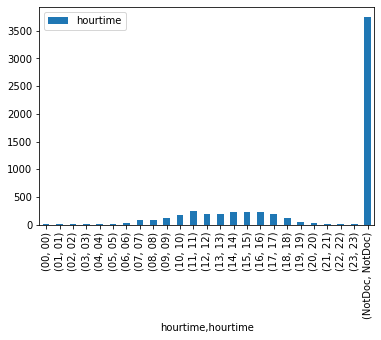

In [74]:
dff.groupby(['hourtime']).agg({'hourtime':'value_counts'
                                
                              }).plot.bar()

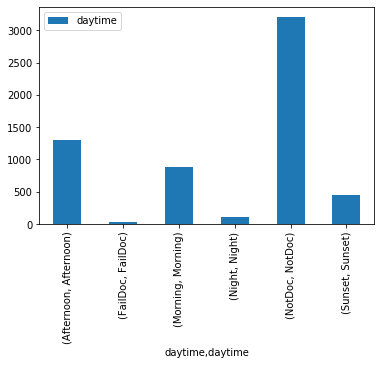

In [75]:
dff.groupby(['daytime']).agg({'daytime':'value_counts'
                                
                              }).plot.bar()